# Project: Wrangling and Analyze Data

## Importing Packages

In [1]:
# importing the required packages for this analysis
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import requests
import tweepy
import json
from datetime import date
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# loading the twitter archive dataset
twitter_archive = pd.read_csv(r'C:\Users\ignatius.ebigwai\Documents\Personal\Udacity\Project 2\twitter-archive-enhanced-2.csv')
twitter_archive.head(2)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# using the request library to download and access the image dataset
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
# reading the imgae data in pandas dataframe and displaying the first 5 rows
image_pred = pd.read_csv(r'C:\Users\ignatius.ebigwai\Documents\Personal\Udacity\Project 2\image-predictions-3.tsv', sep='\t')
image_pred.head(2)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# reading the json data into a list
tweet_json = []

with open('tweet-json', 'r') as file:
    for line in file:
        tweet_json.append(json.loads(line))

In [6]:
# displaying the entire dataset
tweet_json

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [7]:
# displaying the first list in the dataset
tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [8]:
 # displaying the number of columns in the first item in the json dataset
for i, v in enumerate(tweet_json[0]):
    print(i,v)

0 created_at
1 id
2 id_str
3 full_text
4 truncated
5 display_text_range
6 entities
7 extended_entities
8 source
9 in_reply_to_status_id
10 in_reply_to_status_id_str
11 in_reply_to_user_id
12 in_reply_to_user_id_str
13 in_reply_to_screen_name
14 user
15 geo
16 coordinates
17 place
18 contributors
19 is_quote_status
20 retweet_count
21 favorite_count
22 favorited
23 retweeted
24 possibly_sensitive
25 possibly_sensitive_appealable
26 lang


In [9]:
# displaying the lenght of the list
len(tweet_json)

2354

In [10]:
# reading the json dataset into a list and ddisplaying the first 5 rows
tweet = pd.DataFrame(tweet_json, columns=['id', 'retweet_count', 'favorite_count', 'lang', 'source'])
tweet.head()

id  retweet_count  favorite_count lang  \
0  892420643555336193           8853           39467   en   
1  892177421306343426           6514           33819   en   
2  891815181378084864           4328           25461   en   
3  891689557279858688           8964           42908   en   
4  891327558926688256           9774           41048   en   

                                              source  
0  <a href="http://twitter.com/download/iphone" r...  
1  <a href="http://twitter.com/download/iphone" r...  
2  <a href="http://twitter.com/download/iphone" r...  
3  <a href="http://twitter.com/download/iphone" r...  
4  <a href="http://twitter.com/download/iphone" r...

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [12]:
# displaying the dimension of the twitter archive dataset
twitter_archive.shape

(2356, 17)

In [13]:
# checking for missing values and the data type of each column
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
# cecking for missing values in each column
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

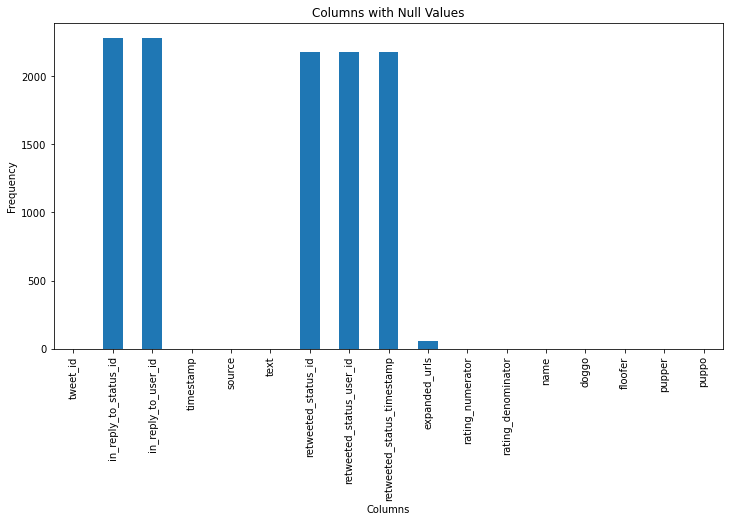

In [15]:
# graphical display of missing data for each column of the twitter dataset
twitter_archive.isnull().sum().plot(kind ='bar', figsize=(12,6))
plt.title("Columns with Null Values")
plt.xlabel("Columns")
plt.ylabel("Frequency");

In [16]:
# checking for duplicates
twitter_archive.duplicated().sum()

0

In [17]:
# statistical summary of twitter_archive dataset
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

From the results of the code run above we can see that there are qualities issues in twitter_archive dataset. 

In [18]:
# first 10 rows of image_pred dataset
image_pred.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [19]:
# dimension of image_pred dataset
image_pred.shape

(2075, 12)

In [20]:
# summary of the 
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# checking for duplicates
image_pred.duplicated().sum()

0

In [22]:
# checking for duplicates
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
# statistical summary of image_pred dataset
image_pred.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [24]:
# first 5 rows in the tweet dataset
tweet.head()

id  retweet_count  favorite_count lang  \
0  892420643555336193           8853           39467   en   
1  892177421306343426           6514           33819   en   
2  891815181378084864           4328           25461   en   
3  891689557279858688           8964           42908   en   
4  891327558926688256           9774           41048   en   

                                              source  
0  <a href="http://twitter.com/download/iphone" r...  
1  <a href="http://twitter.com/download/iphone" r...  
2  <a href="http://twitter.com/download/iphone" r...  
3  <a href="http://twitter.com/download/iphone" r...  
4  <a href="http://twitter.com/download/iphone" r...

In [25]:
# dimension of tweet dataset
tweet.shape

(2354, 5)

In [26]:
# summary of tweet dataset
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
 4   source          2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [27]:
# checking for null values
tweet.isnull().sum()

id                0
retweet_count     0
favorite_count    0
lang              0
source            0
dtype: int64

In [28]:
# checking for duplicates
sum(tweet.duplicated())

0

From the results of the above code, we can se that tweet and image pred datasets are devoid of null valuse or missing valuse and do not have duplicated valuse as well. So we will be cleaning only the twitter_archive dataset

### Quality issues

1. in_reply_to_status_id column has 2278 null (nan) values

2. in_reply_to_user_id column has 2278 null (nan) values

3. timestamp column is of dtype object as against time

4. retweeted_status_timestamp column is of dtype object as against time

5. retweeted_status_id column has 2278 null (nan) values

6. retweeted_status_user_id column has 2278 null (nan) values

7. retweeted_status_timestamp column has 2278 null (nan) values

8. expanded_urls column has 2278 null (nan) values

### Tidiness issues
1. Some of the observation in 'twitter_archive' dataset does not form a row

2. Some of the variables in 'twitter_archive' datset does not form a column example of such columns are doggo, retweeted_status_user_id, retweeted_status_id etc
3. Rename the id column in the 'tweet' dataset to tweet_id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_clean = tweet.copy()

### Issue #1:

#### Define:
1. convert the time stamp columns to datetime object

#### Code

In [30]:
# converting columns in object dtype to datetime dtype
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])
twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive['retweeted_status_timestamp'])

#### Test

In [31]:
# summary of twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [32]:
# unique values in the doggo column
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [33]:
# 10 random samples of twitter_archive dataset
twitter_archive.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
630   794332329137291264                    NaN                  NaN   
488   813944609378369540                    NaN                  NaN   
170   859074603037188101                    NaN                  NaN   
327   833732339549220864                    NaN                  NaN   
1007  747600769478692864                    NaN                  NaN   
842   766793450729734144                    NaN                  NaN   
1144  727286334147182592                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
1170  720775346191278080                    NaN                  NaN   
1832  676191832485810177                    NaN                  NaN   

                     timestamp  \
630  2016-11-04 00:15:59+00:00   
488  2016-12-28 03:08:11+00:00   
170  2017-05-01 15:58:40+00:00   
327  2017-02-20 17:37:34+00:00   
1007 2016-06-28 01:21:27+00:00   
842  2016-08-20 00:26:19+00:00   
1144 2016-05-02 23:59:09+00:00   
17   2017-07-22 16:56:37+00:00   
1170 2016-04-15 00:46:48+00:00   
1832 2015-12-14 00:07:50+00:00   

                                                 source  \
630   <a href="http://twitter.com/download/iphone" r...   
488   <a href="http://twitter.com/download/iphone" r...   
170   <a href="http://twitter.com/download/iphone" r...   
327   <a href="http://twitter.com/download/iphone" r...   
1007  <a href="http://twitter.com/download/iphone" r...   
842   <a href="http://twitter.com/download/iphone" r...   
1144  <a href="http://twitter.com/download/iphone" r...   
17    <a href="http://twitter.com/download/iphone" r...   
1170  <a href="http://twitter.com/download/iphone" r...   
1832  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
630   This is Nimbus (like the cloud). He just bough...                  NaN   
488   RT @dog_rates: This is Bruce. He never backs d...         7.902771e+17   
170   Here we have an exotic dog. Good at ukulele. F...                  NaN   
327   RT @rolltidered: This is Gabby. Now requests t...         8.324344e+17   
1007  This is Bookstore and Seaweed. Bookstore is ti...                  NaN   
842   This is Rufus. He just missed out on the 100m ...                  NaN   
1144  I swear to god if we get sent another Blue Mad...                  NaN   
17    This is Zeke. He has a new stick. Very proud o...                  NaN   
1170  This is Berkeley. He's in a predicament. 10/10...                  NaN   
1832  These two pups just met and have instantly bon...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
630                        NaN                        NaT   
488               4.196984e+09  2016-10-23 19:42:02+00:00   
170                        NaN                        NaT   
327               4.466750e+07  2017-02-17 03:39:51+00:00   
1007                       NaN                        NaT   
842                        NaN                        NaT   
1144                       NaN                        NaT   
17                         NaN                        NaT   
1170                       NaN                        NaT   
1832                       NaN                        NaT   

                                          expanded_urls  rating_numerator  \
630   https://twitter.com/dog_rates/status/794332329...                12   
488   https://twitter.com/dog_rates/status/790277117...                11   
170   https://twitter.com/dog_rates/status/859074603...                13   
327   https://twitter.com/rolltidered/status/8324343...                12   
1007  https://twitter.com/dog_rates/status/747600769...                10   
842   https://twitter.com/dog_rates/status/766793450...                10   
1144  https://twitter.com/dog_rates/status/727286334...                 9   
17    https://twitter.com/dog

### Issue #2:

#### Define
1. Drop or remove entire rows with null values using the dropna function
2. Drop or remove columns with 2278 null values

In [34]:
# dimension of twitter_archive dataset
twitter_archive.shape

(2356, 17)

In [35]:
# summary of twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Code

In [36]:
# dropping null value
twitter_archive.dropna(axis = 1, inplace=True)

#### Test

In [37]:
# checking for null values
twitter_archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [38]:
# summary of twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


In [39]:
# dimension of twitter_archive dataset
twitter_archive.shape

(2356, 11)

### Issue #3:

#### Define

Rename the id column in the 'tweet' dataset to tweet_id using the rename function

#### Code

In [40]:
# renaming the column from "id" to "tweet_id"
tweet.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [41]:
# summary of the tweet dataset
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   lang            2354 non-null   object
 4   source          2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [42]:
# dimension of twitter_archive dataset
twitter_archive.shape

(2356, 11)

In [43]:
# dimension of image_pred dataset
image_pred.shape

(2075, 12)

In [44]:
# dimension of tweet
tweet.shape

(2354, 5)

In [45]:
# merging twitter_archive and image_pred datasets
merge_1 = pd.merge(twitter_archive, image_pred, on = "tweet_id", how = "inner")

In [46]:
# dimension of the 
merge_1.shape

(2075, 22)

In [47]:
# merging merge_1 and tweet datasets
twitter_archive_master = pd.merge(merge_1, tweet, on = "tweet_id", how = "inner")

In [48]:
# dimension of the combined three datasets
twitter_archive_master.shape

(2073, 26)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
# saving the combined dataset
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

The combined dataset has now been saved 

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [50]:
# displaying the first 2 rows of the combined dataset
twitter_archive_master.head(2)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   

                                            source_x  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   

   rating_denominator     name doggo floofer pupper  ...        p2   p2_conf  \
0                  10  Phineas  None    None   None  ...     bagel  0.085851   
1                  10    Tilly  None    None   None  ...  Pekinese  0.090647   

   p2_dog        p3   p3_conf  p3_dog retweet_count  favorite_count  lang  \
0   False    banana  0.076110   False          8853           39467    en   
1    True  papillon  0.068957    True          6514           33819    en   

                                            source_y  
0  <a href="http://twitter.com/download/iphone" r...  
1  <a href="http://twitter.com/download/iphone" r...  

[2 rows x 26 columns]

In [51]:
# summary of the combined dataset
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2073 non-null   int64              
 1   timestamp           2073 non-null   datetime64[ns, UTC]
 2   source_x            2073 non-null   object             
 3   text                2073 non-null   object             
 4   rating_numerator    2073 non-null   int64              
 5   rating_denominator  2073 non-null   int64              
 6   name                2073 non-null   object             
 7   doggo               2073 non-null   object             
 8   floofer             2073 non-null   object             
 9   pupper              2073 non-null   object             
 10  puppo               2073 non-null   object             
 11  jpg_url             2073 non-null   object             
 12  img_num             2073 non-null 

In [52]:
# minimum of date 
twitter_archive_master['timestamp'].min()

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [53]:
# maximum of date
twitter_archive_master['timestamp'].max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

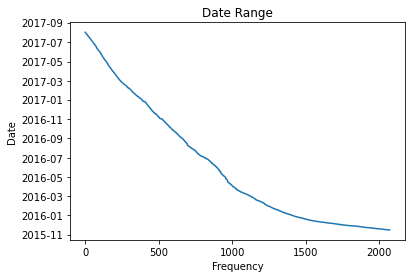

In [54]:
# plot of time graph
twitter_archive_master['timestamp'].plot(kind='line')
plt.title("Date Range")
plt.xlabel("Frequency")
plt.ylabel("Date");

In [55]:
# counting the occurence of each date
twitter_archive_master['timestamp'].value_counts()

2017-08-01 16:23:56+00:00    1
2016-01-08 04:21:00+00:00    1
2016-01-04 01:53:37+00:00    1
2016-01-04 02:18:42+00:00    1
2016-01-04 03:18:23+00:00    1
                            ..
2016-08-18 00:28:24+00:00    1
2016-08-18 01:03:45+00:00    1
2016-08-18 16:38:26+00:00    1
2016-08-18 23:55:18+00:00    1
2015-11-15 22:32:08+00:00    1
Name: timestamp, Length: 2073, dtype: int64

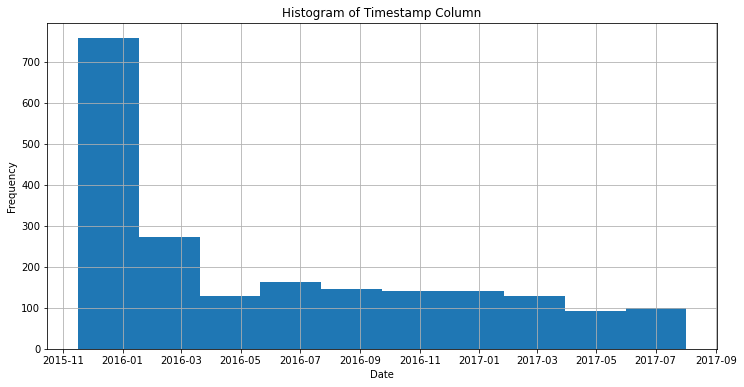

In [56]:
# histogram of the timestamp column
twitter_archive_master['timestamp'].hist(figsize=(12,6))
plt.title("Histogram of Timestamp Column")
plt.xlabel("Date")
plt.ylabel("Frequency");

The period under review is  from 15th November 2015 to 1st August 2017 which is 626 days. The result of the code shows there were more samples in the first 2 - 3 months compared to other months.

In [57]:
# counting the values in the retweet count column
twitter_archive_master['retweet_count'].value_counts()

542     4
71      4
1972    4
819     4
577     4
       ..
3018    1
848     1
1300    1
1612    1
147     1
Name: retweet_count, Length: 1600, dtype: int64

In [58]:
# counting the values in the retweet count column
twitter_archive_master['retweet_count'].value_counts().sort_index()

16       1
23       2
34       2
37       2
38       1
        ..
45849    1
48265    1
52360    1
56625    2
79515    1
Name: retweet_count, Length: 1600, dtype: int64

In [59]:
# dislaying the unique values in favorite_count column
twitter_archive_master['favorite_count'].unique()

array([39467, 33819, 25461, ...,   128,   132,  2535], dtype=int64)

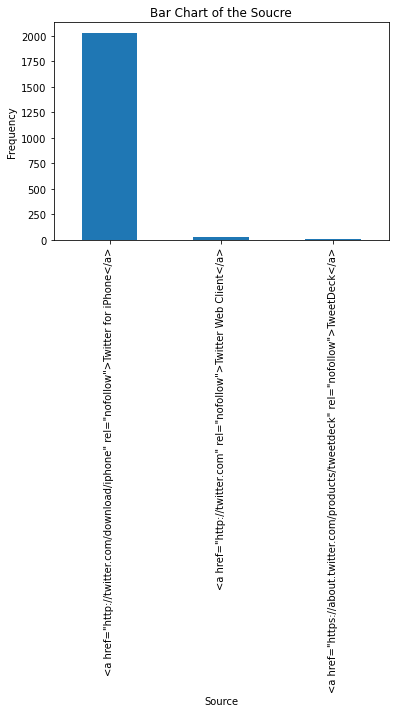

In [60]:
# bar graph of the source_x column
twitter_archive_master.source_x.value_counts().plot(kind='bar');
plt.title("Bar Chart of the Soucre")
plt.xlabel("Source")
plt.ylabel("Frequency");

In [61]:
# bar graph of the source_x column
twitter_archive_master.source_x.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_x, dtype: int64

In [62]:
# unique values of the source_x column
twitter_archive_master.source_x.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

From the results of the last few codes we can see that the imformation was providers mainly by iPhone users.


In order to get the ratings for each record let us create a new feature called rating by dividing the rating_numerator by rating_denominator

In [63]:
# feature engineering: creating the rating column from the rating_numerator and rating_denominator columns
twitter_archive_master['ratings'] = twitter_archive_master.rating_numerator/twitter_archive_master.rating_denominator

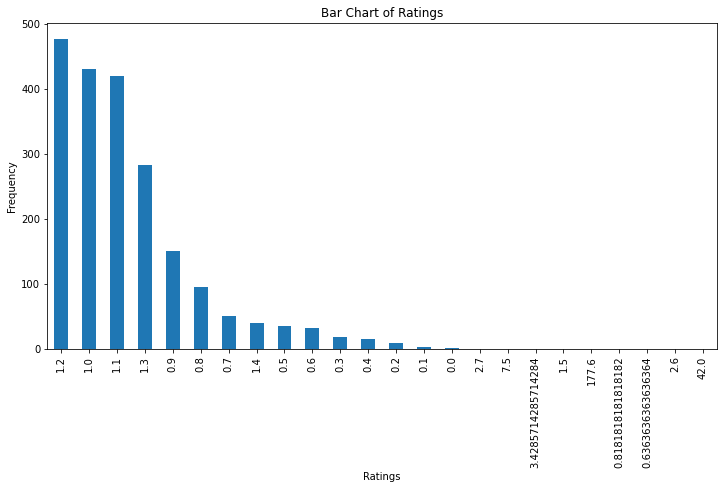

In [64]:
# bar chart of the rating
twitter_archive_master['ratings'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title("Bar Chart of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency");

In [65]:
# counting the occurence of each rating
twitter_archive_master['ratings'].value_counts()

1.200000      477
1.000000      431
1.100000      419
1.300000      283
0.900000      151
0.800000       95
0.700000       51
1.400000       40
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
2.700000        1
7.500000        1
3.428571        1
1.500000        1
177.600000      1
0.818182        1
0.636364        1
2.600000        1
42.000000       1
Name: ratings, dtype: int64

It is obvious from the results above that the most rating given in the dataset was 1.2. There seem to be some erroneous  data enter which are ratings of 42 and 177. However the values only occurred ones and as such can be deleted. let us delete these erroneous  ratings

### Define

Delete rows with erraneous ratings

In [66]:
# viewing rows with erraneous ratings
twitter_archive_master[twitter_archive_master['ratings'] == 177.6]

tweet_id                 timestamp  \
802  749981277374128128 2016-07-04 15:00:45+00:00   

                                              source_x  \
802  <a href="https://about.twitter.com/products/tw...   

                                                  text  rating_numerator  \
802  This is Atticus. He's quite simply America af....              1776   

     rating_denominator     name doggo floofer pupper  ...   p2_conf p2_dog  \
802                  10  Atticus  None    None   None  ...  0.080822  False   

           p3   p3_conf  p3_dog  retweet_count favorite_count  lang  \
802  sunglass  0.050776   False           2772           5569    en   

                                              source_y ratings  
802  <a href="https://about.twitter.com/products/tw...   177.6  

[1 rows x 27 columns]

In [67]:
# viewing rows with erraneous ratings
twitter_archive_master[twitter_archive_master['ratings'] == 42]

tweet_id                 timestamp  \
1795  670842764863651840 2015-11-29 05:52:33+00:00   

                                               source_x  \
1795  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
1795  After so many requests... here you go.\n\nGood...               420   

      rating_denominator  name doggo floofer pupper  ...   p2_conf p2_dog  \
1795                  10  None  None    None   None  ...  0.094075  False   

             p3   p3_conf  p3_dog  retweet_count favorite_count  lang  \
1795  drumstick  0.061113   False           4324           7989    en   

                                               source_y ratings  
1795  <a href="http://twitter.com/download/iphone" r...    42.0  

[1 rows x 27 columns]

### Code

In [68]:
twitter_archive_master.drop([802,1795], axis=0, inplace=True)

### Test

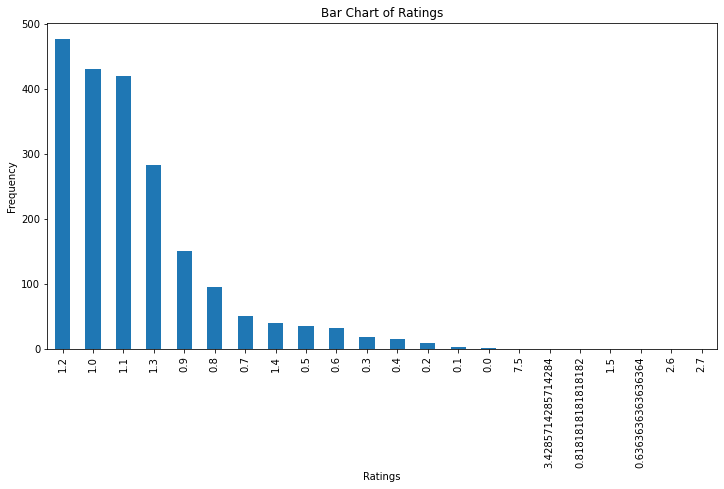

In [69]:
# bar chart of the ratings
twitter_archive_master['ratings'].value_counts().plot(kind='bar', figsize=(12,6));
plt.title("Bar Chart of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency");

In [70]:
# saving the combined dataset
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [71]:
# frequency of image number
twitter_archive_master.img_num.value_counts()

1    1777
2     197
3      66
4      31
Name: img_num, dtype: int64

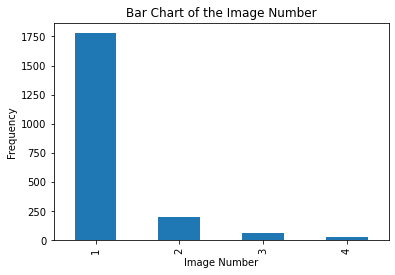

In [72]:
# bar chart of image number
twitter_archive_master.img_num.value_counts().plot(kind='bar')
plt.title("Bar Chart of the Image Number")
plt.xlabel("Image Number")
plt.ylabel("Frequency");

In [73]:
# count of image number
twitter_archive_master.img_num.value_counts()

1    1777
2     197
3      66
4      31
Name: img_num, dtype: int64

In [74]:
# frequency of language in the dataset
twitter_archive_master.lang.value_counts()

en    2063
nl       3
in       2
eu       1
ro       1
et       1
Name: lang, dtype: int64

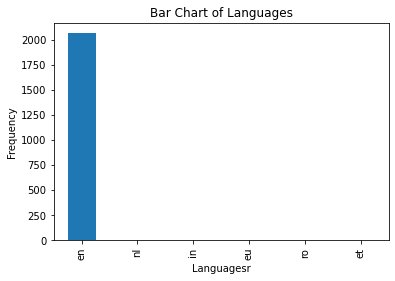

In [75]:
# bar chart of language
twitter_archive_master.lang.value_counts().plot(kind='bar')
plt.title("Bar Chart of Languages")
plt.xlabel("Languagesr")
plt.ylabel("Frequency");

In [76]:
# frequency of the values in the source_y column
twitter_archive_master.source_y.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2031
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source_y, dtype: int64

In [77]:
# frequency of the values in the source_x column
twitter_archive_master.source_x.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2031
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source_x, dtype: int64

In [78]:
# checking for equality of the source_y and source_x columns
twitter_archive_master.source_x == twitter_archive_master.source_y

0       True
1       True
2       True
3       True
4       True
        ... 
2068    True
2069    True
2070    True
2071    True
2072    True
Length: 2071, dtype: bool

In [79]:
# checking the lenght of both columns
sum(twitter_archive_master.source_x == twitter_archive_master.source_y)

2071

### Define

Delete source_y column using the drop function

### Code

In [80]:
# dropping the source_y column
twitter_archive_master.drop(['source_y'], axis = 1, inplace = True)

### Test

In [81]:
# summary of the twitter_archive_master dataset
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2071 non-null   int64              
 1   timestamp           2071 non-null   datetime64[ns, UTC]
 2   source_x            2071 non-null   object             
 3   text                2071 non-null   object             
 4   rating_numerator    2071 non-null   int64              
 5   rating_denominator  2071 non-null   int64              
 6   name                2071 non-null   object             
 7   doggo               2071 non-null   object             
 8   floofer             2071 non-null   object             
 9   pupper              2071 non-null   object             
 10  puppo               2071 non-null   object             
 11  jpg_url             2071 non-null   object             
 12  img_num             2071 non-null 

In [82]:
# dimension of the dataset
twitter_archive_master.shape

(2071, 26)

Values in the source_x and source_y columns are identical in values as seen above. We can drop or delete on of the columns. Lets delete the source_y column

In [83]:
# calculating the avarage favorite count
Avg_favorite_count = twitter_archive_master.favorite_count.sum()/twitter_archive_master.shape[0]
Avg_favorite_count

8558.43505552873

In [84]:
# number of records that have a rating greater than the avarage favorite rating
len(twitter_archive_master[twitter_archive_master['favorite_count'] > Avg_favorite_count])

640

In [85]:
# number of records that have a rating less than the avarage favorite rating
len(twitter_archive_master[twitter_archive_master['favorite_count'] < Avg_favorite_count])

1431

In [86]:
# calculating the avarage retweet count
Avg_retweet_count = twitter_archive_master.retweet_count.sum()/twitter_archive_master.shape[0]
Avg_retweet_count

2975.5369386769676

In [87]:
# number of records that have a retweet count greater than the avarage retweet count
len(twitter_archive_master[twitter_archive_master['retweet_count'] > Avg_retweet_count])

593

In [88]:
# number of records that have retweet count less than the avarage retweet count
len(twitter_archive_master[twitter_archive_master['retweet_count'] < Avg_retweet_count])

1478

In [89]:
# creating a subset of the dataset with records that are above the avarage favorite count
above_avg_favorite_count = twitter_archive_master[twitter_archive_master['favorite_count'] > Avg_favorite_count]

In [90]:
# creating a subset of the data with records that are above the avarage retweet count
above_avg_retweet_count = twitter_archive_master[twitter_archive_master['retweet_count'] > Avg_retweet_count]

In [91]:
# frequency of names in the above avarage favorite count dataset
above_avg_favorite_count.name.value_counts()

None       137
Charlie      6
Bo           5
Penny        4
Winston      4
          ... 
Meera        1
Mookie       1
Vincent      1
Arlo         1
Pipsy        1
Name: name, Length: 400, dtype: int64

In [92]:
# total uniques count of names in the above avarage favorite count dataset
above_avg_favorite_count.name.nunique()

400

In [93]:
# first 2 rows with none as name in the above avarage favorite count dataset
above_avg_favorite_count[above_avg_favorite_count['name'] == 'None'].head(2)

tweet_id                 timestamp  \
5  891087950875897856 2017-07-29 00:08:17+00:00   
7  890729181411237888 2017-07-28 00:22:40+00:00   

                                            source_x  \
5  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
5  Here we have a majestic great white breaching ...                13   
7  When you watch your owner call another dog a g...                13   

   rating_denominator  name doggo floofer pupper  ...             p2  \
5                  10  None  None    None   None  ...  Irish_terrier   
7                  10  None  None    None   None  ...     Eskimo_dog   

    p2_conf  p2_dog               p3   p3_conf  p3_dog retweet_count  \
5  0.116317    True  Indian_elephant  0.076902   False          3261   
7  0.178406    True         Pembroke  0.076507    True         16716   

   favorite_count  lang ratings  
5           20562    en     1.3  
7           56848    en     1.3  

[2 rows x 26 columns]

In [94]:
# frequency of names in the above avarage retweet count dataset
above_avg_retweet_count.name.value_counts()

None       142
Bo           7
Charlie      6
Penny        5
Stanley      4
          ... 
Monty        1
Winston      1
Odie         1
Meera        1
Pipsy        1
Name: name, Length: 334, dtype: int64

In [95]:
# total uniques count of names in the above avarage retweet count dataset
above_avg_retweet_count.name.nunique()

334

In [96]:
# first 2 rows with none as name in the above avarage retweet count dataset
above_avg_retweet_count[above_avg_retweet_count['name'] == 'None'].head(2)

tweet_id                 timestamp  \
5  891087950875897856 2017-07-29 00:08:17+00:00   
7  890729181411237888 2017-07-28 00:22:40+00:00   

                                            source_x  \
5  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
5  Here we have a majestic great white breaching ...                13   
7  When you watch your owner call another dog a g...                13   

   rating_denominator  name doggo floofer pupper  ...             p2  \
5                  10  None  None    None   None  ...  Irish_terrier   
7                  10  None  None    None   None  ...     Eskimo_dog   

    p2_conf  p2_dog               p3   p3_conf  p3_dog retweet_count  \
5  0.116317    True  Indian_elephant  0.076902   False          3261   
7  0.178406    True         Pembroke  0.076507    True         16716   

   favorite_count  lang ratings  
5           20562    en     1.3  
7           56848    en     1.3  

[2 rows x 26 columns]

In [97]:
# highest retweet count
max_retweet_count = twitter_archive_master['retweet_count'].max()
max_retweet_count

79515

In [98]:
# record with the highest retweet count
twitter_archive_master[twitter_archive_master['retweet_count'] == max_retweet_count]

tweet_id                 timestamp  \
851  744234799360020481 2016-06-18 18:26:18+00:00   

                                              source_x  \
851  <a href="http://twitter.com/download/iphone" r...   

                                                  text  rating_numerator  \
851  Here's a doggo realizing you can stand in a po...                13   

     rating_denominator  name  doggo floofer pupper  ...        p2   p2_conf  \
851                  10  None  doggo    None   None  ...  ice_bear  0.044681   

     p2_dog       p3   p3_conf  p3_dog retweet_count  favorite_count  lang  \
851   False  whippet  0.018442    True         79515          131075    en   

    ratings  
851     1.3  

[1 rows x 26 columns]

In [99]:
# highest favorite count
max_favorite_count = twitter_archive_master['favorite_count'].max()
max_favorite_count

132810

In [100]:
# record with the highest favorite count
twitter_archive_master[twitter_archive_master['favorite_count'] == max_favorite_count]

tweet_id                 timestamp  \
329  822872901745569793 2017-01-21 18:26:02+00:00   

                                              source_x  \
329  <a href="http://twitter.com/download/iphone" r...   

                                                  text  rating_numerator  \
329  Here's a super supportive puppo participating ...                13   

     rating_denominator  name doggo floofer pupper  ...                  p2  \
329                  10  None  None    None   None  ...  Labrador_retriever   

      p2_conf  p2_dog             p3   p3_conf  p3_dog retweet_count  \
329  0.160329    True  Irish_terrier  0.069126    True         48265   

     favorite_count  lang ratings  
329          132810    en     1.3  

[1 rows x 26 columns]

### Insights:
1. This data were mainly users of iPhone

2. The most rating is 1.2

3. The most image number is 1

4. The most language is en

5. The avarage favorite count is 8556

6. The avarage retweet count is 2976

7. 640 records are above the average favorite count while 1433 is less than the average favorite count

8. 594 records are greater than the average retweet count while 1479 is less than the average

9. The maximum retweet count is 79515 with tweet id 744234799360020481

10. The maximum favorite count is 132810 with tweet id 822872901745569793

### Visualization

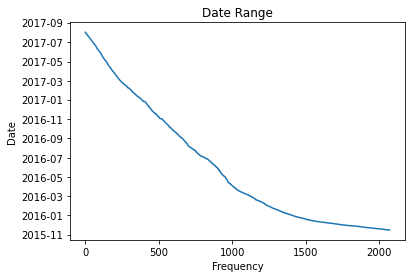

In [101]:
# plot of time graph
twitter_archive_master['timestamp'].plot(kind='line')
plt.title("Date Range")
plt.xlabel("Frequency")
plt.ylabel("Date");

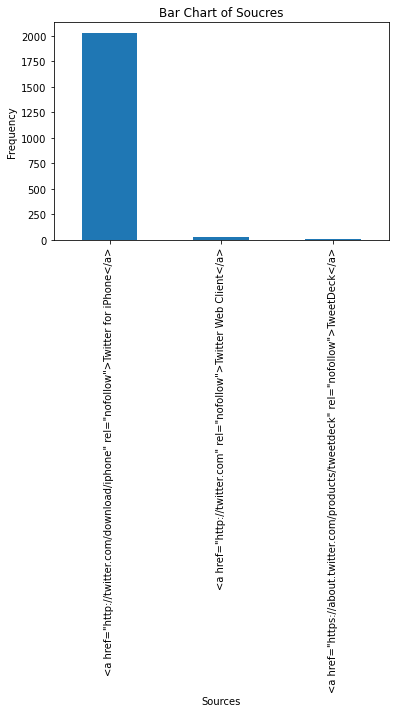

In [102]:
# bar graph of the source_x column
twitter_archive_master.source_x.value_counts().plot(kind='bar');
plt.title("Bar Chart of Soucres")
plt.xlabel("Sources")
plt.ylabel("Frequency");

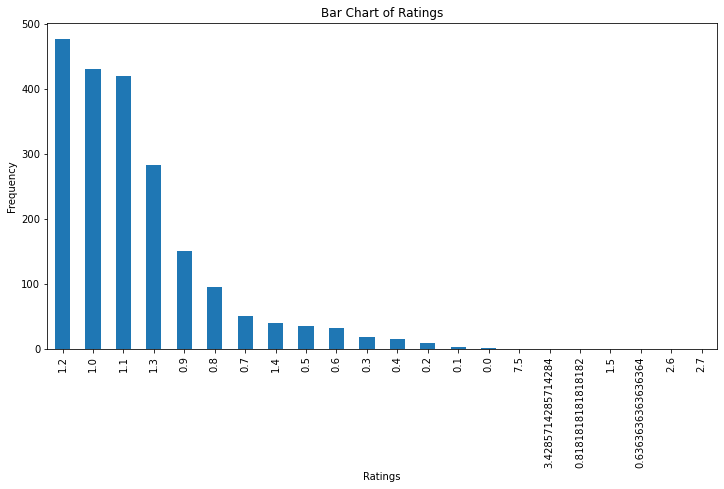

In [103]:
# bar chart of the ratings
twitter_archive_master['ratings'].value_counts().plot(kind='bar', figsize=(12,6));
plt.title("Bar Chart of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency");

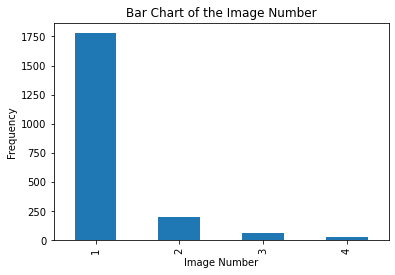

In [104]:
# bar chart of image number
twitter_archive_master.img_num.value_counts().plot(kind='bar')
plt.title("Bar Chart of the Image Number")
plt.xlabel("Image Number")
plt.ylabel("Frequency");

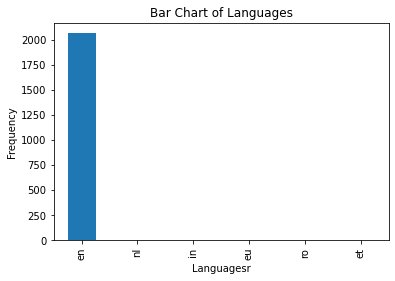

In [105]:
# bar chart of language
twitter_archive_master.lang.value_counts().plot(kind='bar')
plt.title("Bar Chart of Languages")
plt.xlabel("Languagesr")
plt.ylabel("Frequency");

Reference site: stackoverflow, geeksforgeeks, google and freecodecamp